# FENE beadspring experiment data analysis

In [1]:
import os

import polyflexmd.data_analysis.data.read as read
import polyflexmd.data_analysis.transform.transform as transform
import polyflexmd.data_analysis.plot.plot_system as plot_system
import polyflexmd.experiment_runner.config
import pandas as pd
import pathlib
import matplotlib.pyplot as plt
import numpy as np
from pandarallel import pandarallel

In [2]:
%load_ext autoreload
%autoreload 2

In [3]:
pandarallel.initialize(
    nb_workers=len(os.sched_getaffinity(0)),
    progress_bar=False,
    use_memory_fs=False
)

INFO: Pandarallel will run on 128 workers.
INFO: Pandarallel will use standard multiprocessing data transfer (pipe) to transfer data between the main process and workers.


## Read data

In [8]:
PATH_EXPERIMENT = "/scratch/ws/0/s4610340-bt-eea1-md-workspace/data/experiment_results/FENE-beadspring-free-angle/3-FENE-beadspring-free-angle/8b2b60a0"
NAME_EC = "3-FENE-beadspring-free-angle.toml"

In [9]:
PATH_EXPERIMENT = pathlib.Path(PATH_EXPERIMENT)

PATHS_TRAJECTORIES = [
    PATH_EXPERIMENT / "data/raw/polymer_relax.out",
    PATH_EXPERIMENT / "data/raw/polymer.out",
]

PATH_SYSTEM_DEF = PATH_EXPERIMENT / "data/initial_system.data"

In [10]:
PATH_DATA_PROCESSED = PATH_EXPERIMENT / "data" / "processed"
PATH_DATA_PROCESSED.mkdir(exist_ok=True, parents=True)
PATH_DF_TRAJECTORY_PROCESSED = PATH_DATA_PROCESSED / "trajectory_unfolded.csv"
PATH_DF_TRAJECTORY_PROCESSED

PosixPath('/scratch/ws/0/s4610340-bt-eea1-md-workspace/data/experiment_results/FENE-beadspring-free-angle/3-FENE-beadspring-free-angle/8b2b60a0/data/processed/trajectory_unfolded.csv')

### Experiment config

In [11]:
config_experiment = polyflexmd.experiment_runner.config.read_experiment_config(PATH_EXPERIMENT / NAME_EC)

### Trajectory df

In [17]:
df_trajectory_raw = read.read_multiple_raw_trajectory_dfs(PATHS_TRAJECTORIES)
df_trajectory_raw

,t,id,type,x,y,z,ix,iy,iz
0,0,1,1,0.000000,0.000000,0.000000,0,0,0
1,0,2,1,-0.159927,-0.017451,-0.956566,0,0,0
2,0,3,2,-0.086992,-0.765936,-0.343908,0,0,0
3,0,4,2,0.059319,0.029401,-0.879569,0,0,0
4,0,5,2,0.514538,0.823298,-0.558005,0,0,0
...,...,...,...,...,...,...,...,...,...
31995,10000000,31996,2,-4.857580,-0.754923,-0.722281,0,0,0
31996,10000000,31997,2,-4.764690,-0.676653,-1.687060,0,0,0
31997,10000000,31998,2,-4.680360,-1.146870,-0.841531,0,0,0
31998,10000000,31999,2,-4.878240,-0.628830,-1.618650,0,0,0


### System def

In [18]:
system = read.read_lammps_system_data(PATH_SYSTEM_DEF)
system.atoms

,molecule-ID,type,x,y,z,ix,iy,iz
1,1,1,0.000000,0.000000,0.000000,0,0,0
2,1,1,-0.159927,-0.017451,-0.956566,0,0,0
3,1,2,-0.086992,-0.765936,-0.343908,0,0,0
4,1,2,0.059319,0.029401,-0.879569,0,0,0
5,1,2,0.514538,0.823298,-0.558005,0,0,0
...,...,...,...,...,...,...,...,...
31996,500,2,-0.155401,-2.419676,-5.478630,0,0,0
31997,500,2,0.094138,-2.563573,-4.552388,0,0,0
31998,500,2,-0.319976,-2.430868,-3.685325,0,0,0
31999,500,2,0.280073,-3.192872,-3.671499,0,0,0


In [19]:
system.bonds

,type,atom1,atom2
1,1,1,2
2,1,2,3
3,1,3,4
4,1,4,5
5,1,5,6
...,...,...,...
31496,1,31995,31996
31497,1,31996,31997
31498,1,31997,31998
31499,1,31998,31999


In [20]:
system.angles

,type,atom1,atom2,atom3
1,1,1,2,3
2,1,2,3,4
3,1,3,4,5
4,1,4,5,6
5,1,5,6,7
...,...,...,...,...
30996,1,31994,31995,31996
30997,1,31995,31996,31997
30998,1,31996,31997,31998
30999,1,31997,31998,31999


In [21]:
system.box

-100.000000 100.000000  xlo xhi
-100.000000 100.000000  ylo yhi
-100.000000 100.000000  zlo zhi

## Process data

Join molecule id information

In [22]:
df_trajectory = transform.join_raw_trajectory_df_with_system_data(
    df_trajectory_raw, system
)
df_trajectory

,t,id,type,x,y,z,ix,iy,iz,molecule-ID
0,0,1,1,0.000000,0.000000,0.000000,0,0,0,1
1,0,2,1,-0.159927,-0.017451,-0.956566,0,0,0,1
2,0,3,2,-0.086992,-0.765936,-0.343908,0,0,0,1
3,0,4,2,0.059319,0.029401,-0.879569,0,0,0,1
4,0,5,2,0.514538,0.823298,-0.558005,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...
31995,10000000,31996,2,-4.857580,-0.754923,-0.722281,0,0,0,500
31996,10000000,31997,2,-4.764690,-0.676653,-1.687060,0,0,0,500
31997,10000000,31998,2,-4.680360,-1.146870,-0.841531,0,0,0,500
31998,10000000,31999,2,-4.878240,-0.628830,-1.618650,0,0,0,500


Unfold coordinates

In [23]:
df_trajectory_unfolded = transform.unfold_coordinates_df(df_trajectory, system)
df_trajectory_unfolded

,t,id,type,x,y,z,ix,iy,iz,molecule-ID
0,0,1,1,0.000000,0.000000,0.000000,0,0,0,1
1,0,2,1,-0.159927,-0.017451,-0.956566,0,0,0,1
2,0,3,2,-0.086992,-0.765936,-0.343908,0,0,0,1
3,0,4,2,0.059319,0.029401,-0.879569,0,0,0,1
4,0,5,2,0.514538,0.823298,-0.558005,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...
31995,10000000,31996,2,-4.857580,-0.754923,-0.722281,0,0,0,500
31996,10000000,31997,2,-4.764690,-0.676653,-1.687060,0,0,0,500
31997,10000000,31998,2,-4.680360,-1.146870,-0.841531,0,0,0,500
31998,10000000,31999,2,-4.878240,-0.628830,-1.618650,0,0,0,500


In [ ]:
df_trajectory_unfolded.to_csv(PATH_DF_TRAJECTORY_PROCESSED, index=False)

## Calculate and plot observables

### End-to-End distance $\vec{R}$

In [13]:
PATH_DATA_PROCESSED = PATH_EXPERIMENT / "data" / "processed"
PATH_DATA_PROCESSED.mkdir(exist_ok=True)

PATH_ETE = PATH_EXPERIMENT / "data" / "processed" / "ete.csv"

if PATH_ETE.exists():
    df_ete = pd.read_csv(PATH_ETE, index_col=["molecule-ID", "t"])
else:
    df_ete = transform.calc_end_to_end_df(df_trajectory_unfolded)
    df_ete.to_csv(PATH_ETE, index=True)
df_ete

R_x      R_y       R_z         R
molecule-ID t                                              
1           0         5.307310 -4.65918  5.742710  9.102429
            10000     4.477460 -2.62142  2.985820  5.986202
            20000     3.877650 -5.31453  3.003340  7.231905
            30000     4.671750 -5.92066  0.420909  7.553584
            40000     3.542370 -3.03872 -0.088329  4.667977
...                        ...      ...       ...       ...
500         9960000  -4.325340 -1.80387  1.087830  4.811017
            9970000  -0.542188 -1.56582  4.592320  4.882127
            9980000  -1.514490 -1.18435  2.809650  3.404482
            9990000  -1.668950 -2.35884 -1.988550  3.507685
            10000000 -5.049460 -1.11121 -2.458990  5.725248

[500500 rows x 4 columns]

<Axes: title={'center': 'End-to-end distance $R$ over time.'}, xlabel='t', ylabel='$R$'>

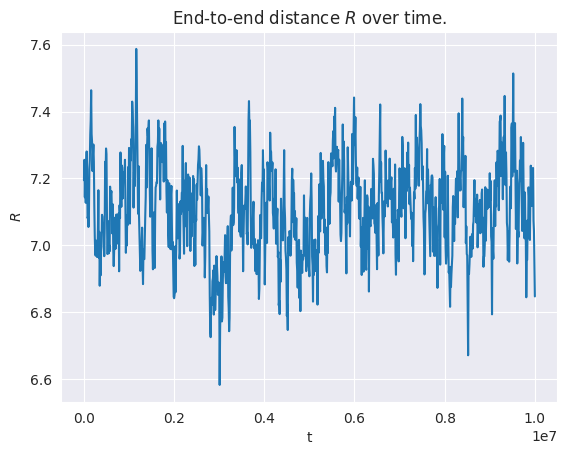

In [14]:
df_ete.groupby("t")["R"].mean().plot(title="End-to-end distance $R$ over time.", ylabel="$R$")

### Change of end-to-end distance over time $g_4$

$g_4(t) = \langle (\vec{R}(t) - \vec{R}(0))^2 \rangle$

In [15]:
df_ete_change = transform.calculate_ete_change_ens_avg_df(df_ete)
df_ete_change

t
0             0.000000
10000        17.029808
20000        25.144421
30000        32.767199
40000        37.212036
               ...    
9960000     114.962732
9970000     114.375574
9980000     115.186804
9990000     112.077267
10000000    112.029533
Length: 1001, dtype: float64

<Axes: title={'center': '$\\langle (\\vec{R}(t) - \\vec{R}(0))^2 \\rangle$'}, xlabel='t', ylabel='$\\langle (\\vec{R}(t) - \\vec{R}(0))^2 \\rangle$'>

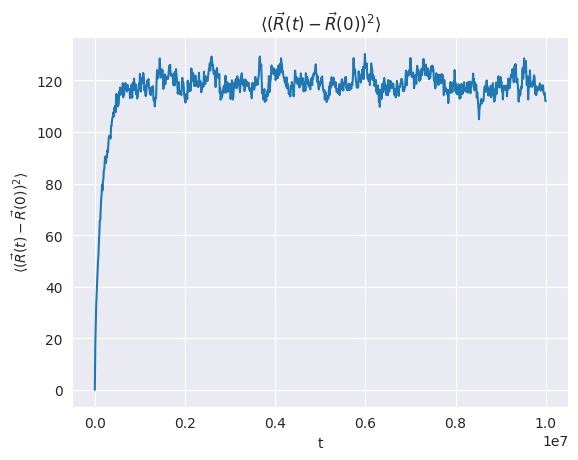

In [16]:
df_ete_change.plot(title=r"$\langle (\vec{R}(t) - \vec{R}(0))^2 \rangle$",
                   ylabel=r"$\langle (\vec{R}(t) - \vec{R}(0))^2 \rangle$")

### Average distance between neighbours $l^2$
$l^2 = \langle (r_k - r_{k-1})^2 \rangle $

In [24]:
l_squared = transform.calculate_neigh_distance_avg_df(df_trajectory_unfolded, t_equilibrium=config_experiment.simulation_config.variables["n_relax_steps"])
l_squared

0.9422539976617197

## Plausibility check of initial system

In [25]:
system.box.bounds

[[-100.0, 100.0], [-100.0, 100.0], [-100.0, 100.0]]

### Plot system

(<Figure size 1000x1000 with 1 Axes>, <Axes3D: >)

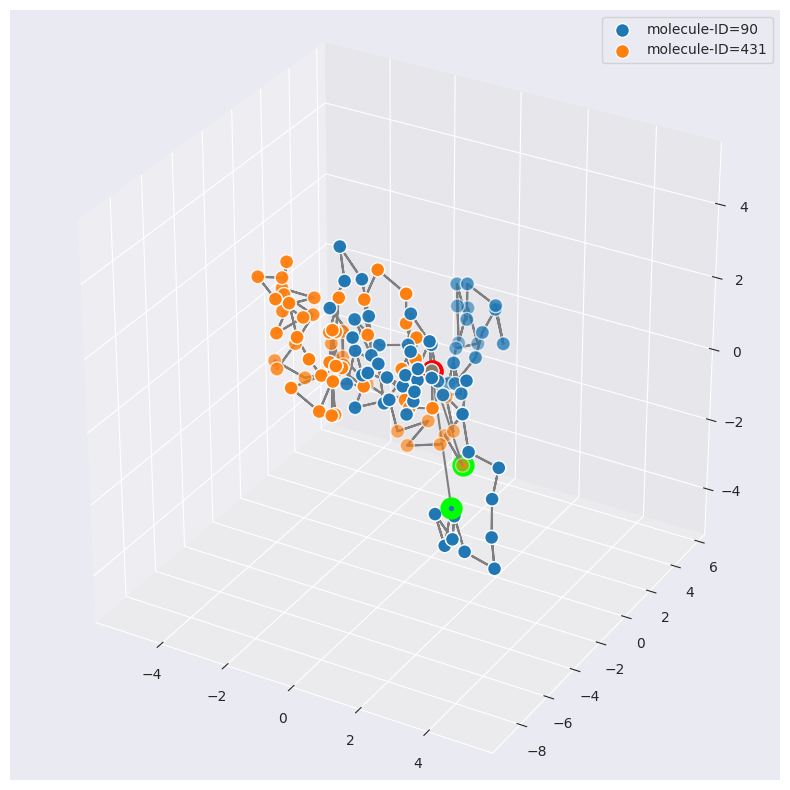

In [29]:
plot_system.plot_initial_system(df_trajectory_unfolded, system, 2)

### Check contour length

In [30]:
contour_length_0 = transform.calculate_contour_length_df(df_trajectory_unfolded.loc[df_trajectory_unfolded["t"] == 0])
contour_length_0

molecule-ID  t
1            0    131.322446
2            0    128.314549
3            0    130.665855
4            0    132.810381
5            0    134.060506
                     ...    
496          0    131.057703
497          0    124.753517
498          0    130.707928
499          0    128.321356
500          0    127.723100
Length: 500, dtype: float64

In [32]:
l_0 = transform.calculate_neigh_distance_avg_df(
    df_trajectory_unfolded.loc[df_trajectory_unfolded["t"] == 0],
    t_equilibrium=config_experiment.simulation_config.variables["n_relax_steps"]
) ** (1 / 2)
N_bonds = len(system.bonds) / len(system.atoms["molecule-ID"].unique())
l_0, N_bonds

/lustre/scratch2/ws/0/s4610340-bt-eea1-md-workspace/polyflexmd/.venv/lib/python3.9/site-packages/numpy/core/fromnumeric.py:3464: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/lustre/scratch2/ws/0/s4610340-bt-eea1-md-workspace/polyflexmd/.venv/lib/python3.9/site-packages/numpy/core/_methods.py:192: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)


(nan, 63.0)

In [33]:
np.allclose(contour_length_0, N_bonds * l_0, rtol=0.01)

False

### Check ete vector mean $\langle \vec{R} \rangle $

In [34]:
df_ete_0 = df_ete.loc[pd.IndexSlice[:, 0], :]
df_ete_0

,,R_x,R_y,R_z,R
molecule-ID,t,,,,
1,0,5.307310,-4.659180,5.74271,9.102429
2,0,0.314673,4.092940,-4.50468,6.094532
3,0,6.079520,3.767500,4.49177,8.445746
4,0,1.151370,3.371950,9.97293,10.590327
5,0,-2.477560,4.304900,10.74840,11.840548
...,...,...,...,...,...
496,0,-1.054250,-2.966890,8.25788,8.837786
497,0,1.389410,-0.357301,2.08816,2.533483
498,0,-0.440981,8.391630,-1.19632,8.487938


In [35]:
df_ete_0[["R_x", "R_y", "R_z"]].sum() / len(df_ete_0[["R_x", "R_y", "R_z"]])

R_x    0.067130
R_y    0.073842
R_z    0.269317
dtype: float64